In [1]:
import mlflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, re, os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor

In [2]:
%matplotlib inline

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 11})

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300

In [3]:
path_to_file = '../bridge_for_magazine/mllog'

In [6]:
with mlflow.start_run():
    # Example: Define hyperparameters and metrics
    n_estimators = 100  # An example hyperparameter
    train_accuracy = 0.95  # An example metric

    # Your machine learning code here
    # model = train_model(n_estimators, ...)
    # train_accuracy = evaluate_model(model, ...)

    # Log parameters (hyperparameters)
    mlflow.log_param("n_estimators", n_estimators)

    # Log metrics (evaluation metrics)
    mlflow.log_metric("train_accuracy", train_accuracy)

    # Log artifacts (output files, plots)
    mlflow.log_artifact("../mllog")


In [6]:
chdir = True

In [4]:
import itertools
marker = itertools.cycle(('x',',', '+', '.', 'o', '*'))
cycol = itertools.cycle('bgrcmk')

# Service chain configuration

In [6]:
current_dir = os.getcwd()
file_path = os.path.abspath('../datasets/load_stimulus_global.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
df = data.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7793 entries, 0 to 1018
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   input_rate                    7793 non-null   float64
 1   output_rate                   7793 non-null   float64
 2   latency                       7793 non-null   float64
 3   bridge_instructions           7793 non-null   float64
 4   bridge_branches               7793 non-null   float64
 5   bridge_branch-misses          7793 non-null   float64
 6   bridge_branch-load-misses     7793 non-null   float64
 7   bridge_cache-misses           7793 non-null   float64
 8   bridge_cache-references       7793 non-null   float64
 9   bridge_cycles                 7793 non-null   float64
 10  bridge_L1-dcache-load-misses  7793 non-null   float64
 11  bridge_L1-dcache-loads        7793 non-null   float64
 12  bridge_LLC-load-misses        7793 non-null   float64
 13  bri

In [7]:
current_dir = os.getcwd()
file_path = os.path.abspath('../datasets/load_stimulus_exp-6.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
corr = data.corr()
correlation_list = []
for i in range(1, 2):
    for j in range(i+1, len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between output_rate and bridge_LLC-stores: 0.91
Correlation between output_rate and bridge_L1-dcache-load-misses: 0.90
Correlation between output_rate and bridge_cache-references: 0.90
Correlation between output_rate and bridge_LLC-loads: 0.88
Correlation between output_rate and bridge_cycles: 0.74
Correlation between output_rate and bridge_branch-load-misses: 0.71
Correlation between output_rate and bridge_branch-misses: 0.71
Correlation between output_rate and bridge_instructions: 0.60
Correlation between output_rate and bridge_branches: 0.59
Correlation between output_rate and bridge_L1-dcache-loads: 0.59
Correlation between output_rate and latency: 0.53
Correlation between output_rate and bridge_LLC-load-misses: 0.24
Correlation between output_rate and bridge_cache-misses: 0.24
Correlation between output_rate and bridge_mem-stores: nan
Correlation between output_rate and bridge_iTLB-loads: 0.05
Correlation between output_rate and bridge_mem-loads: nan
Correlation betwee

In [8]:
corr = data.corr()
correlation_list = []
for i in range(2,3):
    for j in range(i+1, len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between latency and bridge_branch-misses: 0.73
Correlation between latency and bridge_branch-load-misses: 0.73
Correlation between latency and bridge_cycles: 0.72
Correlation between latency and bridge_instructions: 0.71
Correlation between latency and bridge_L1-dcache-loads: 0.71
Correlation between latency and bridge_branches: 0.71
Correlation between latency and bridge_LLC-loads: 0.64
Correlation between latency and bridge_cache-references: 0.64
Correlation between latency and bridge_L1-dcache-load-misses: 0.64
Correlation between latency and bridge_LLC-stores: 0.64
Correlation between latency and bridge_LLC-load-misses: 0.24
Correlation between latency and bridge_cache-misses: 0.22
Correlation between latency and bridge_mem-stores: nan
Correlation between latency and bridge_iTLB-loads: 0.05
Correlation between latency and bridge_mem-loads: nan
Correlation between latency and bridge_bus-cycles: 0.72


# Slomo to predict rate

In [9]:
# training  
from sklearn.ensemble import GradientBoostingRegressor 
X = df.drop(['input_rate','output_rate', 'latency','bridge_bus-cycles','bridge_mem-loads','bridge_iTLB-loads','bridge_mem-stores','bridge_L1-dcache-load-misses','bridge_cache-misses'], axis=1)
y = df['output_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

y_test_indices = y_test.index.tolist()
input_rate_within_y_test = df.loc[y_test_indices, 'input_rate']
latency_within_y_test = df.loc[y_test_indices, 'latency']

# ML model
model = GradientBoostingRegressor()

# train the regressor
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#accuracy
threshold = 0.05 
distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print("Accuracy within 5% threshold:", accuracy_within_threshold)


accuracy_cdf=[]
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

Accuracy within 5% threshold: 19.888793840889647
[0.0, 34.64499572284004, 54.49101796407185, 67.10863986313088, 74.67921300256629, 79.68349016253208, 83.14798973481608, 86.52694610778443, 88.23781009409753, 90.16253207869974, 91.27459366980325]


C:\Users\Qiong\AppData\Local\Temp\ipykernel_26584\1026547674.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]
C:\Users\Qiong\AppData\Local\Temp\ipykernel_26584\1026547674.py:34: RuntimeWarning: divide by zero encountered in double_scalars
  distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]


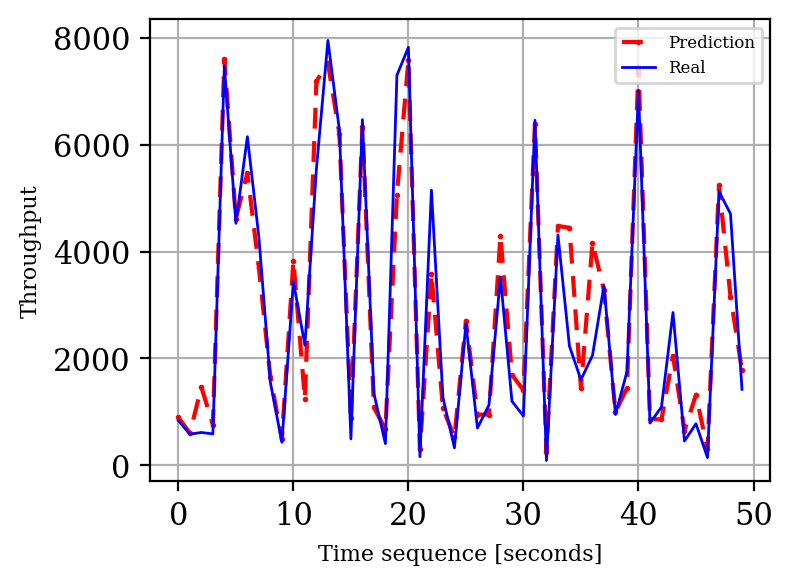

In [10]:
fig, ax = plt.subplots(figsize=(4,3))
plt.plot(y_pred[:50], marker='o',c='r',markersize = 1, linestyle='-', dashes=(5, 3),label='Prediction')
plt.plot(y_test[:50].tolist(), c='b',linestyle='-',linewidth = 1,label='Real')
plt.xlabel('Time sequence [seconds]',fontsize=8)
plt.ylabel('Throughput',fontsize=8)

plt.legend(loc="upper right", fontsize=6)
plt.grid()

In [11]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.8688092361940316


# Dobrescu

In [12]:
# training  
from sklearn.ensemble import GradientBoostingRegressor 
X = df['bridge_cache-references'].values.reshape(-1, 1)
y = df['output_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# ML model
#model = DecisionTreeRegressor(random_state=0)
model = LinearRegression()
#model = RandomForestRegressor(n_estimators=100, random_state=42)
#model = GradientBoostingRegressor()

# train the regressor
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#accuracy
threshold = 0.05 
distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print("Accuracy within 5% threshold:", accuracy_within_threshold)


accuracy_cdf=[]
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

Accuracy within 5% threshold: 8.426005132591959
[0.0, 15.568862275449103, 32.42087254063302, 47.26261762189906, 59.19589392643285, 65.18391787852865, 70.1454234388366, 73.52437981180496, 77.03165098374679, 80.23952095808383, 83.8323353293413]


C:\Users\Qiong\AppData\Local\Temp\ipykernel_26584\3835616998.py:25: RuntimeWarning: divide by zero encountered in double_scalars
  distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]
C:\Users\Qiong\AppData\Local\Temp\ipykernel_26584\3835616998.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]


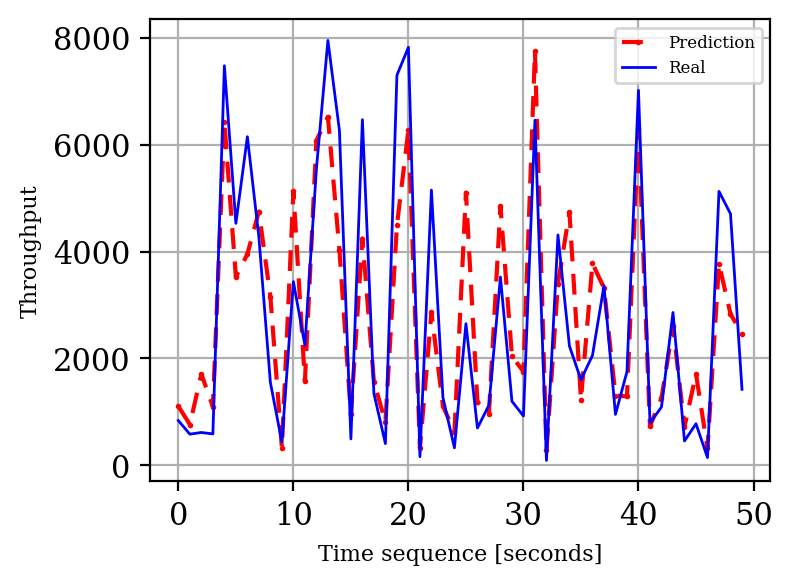

In [13]:
fig, ax = plt.subplots(figsize=(4,3))
plt.plot(y_pred[:50], marker='o',c='r',markersize = 1, linestyle='-', dashes=(5, 3),label='Prediction')
plt.plot(y_test[:50].tolist(), c='b',linestyle='-',linewidth = 1,label='Real')

plt.xlabel('Time sequence [seconds]',fontsize=8)
plt.ylabel('Throughput',fontsize=8)

plt.legend(loc="upper right", fontsize=6)
plt.grid()

In [14]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.7272810489628803


# ANN to predict rate

In [15]:
current_dir = os.getcwd()
file_path = os.path.abspath('../datasets/load_stimulus_global.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
df = data.dropna()

In [16]:
# training 
X = df.drop(['output_rate', 'latency'], axis=1)
X = df.drop(['output_rate', 'latency','bridge_bus-cycles','bridge_mem-loads','bridge_iTLB-loads','bridge_mem-stores','bridge_L1-dcache-load-misses','bridge_cache-misses'], axis=1)
y = df['output_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

column_order = X_train.columns
X_test = X_test[column_order]


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(len(y))

7793


In [17]:
# model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))

# Add input layer and hidden layers with L2 regularization
#model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# Add output layer
model.add(Dense(1))

In [24]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=8, epochs=100, verbose=1)

Epoch 1/100
682/682 [==============================] - 3s 3ms/step - loss: 1982577.3750
Epoch 2/100
682/682 [==============================] - 2s 2ms/step - loss: 493144.5938
Epoch 3/100
682/682 [==============================] - 2s 2ms/step - loss: 464046.4375
Epoch 4/100
682/682 [==============================] - 2s 3ms/step - loss: 449310.6562
Epoch 5/100
682/682 [==============================] - 2s 3ms/step - loss: 434165.9062
Epoch 6/100
682/682 [==============================] - 2s 3ms/step - loss: 429962.4062
Epoch 7/100
682/682 [==============================] - 2s 4ms/step - loss: 429606.5312
Epoch 8/100
682/682 [==============================] - 2s 3ms/step - loss: 425233.3125
Epoch 9/100
682/682 [==============================] - 2s 3ms/step - loss: 417446.0312
Epoch 10/100
682/682 [==============================] - 2s 3ms/step - loss: 420693.0000
Epoch 11/100
682/682 [==============================] - 2s 3ms/step - loss: 423031.1562
Epoch 12/100
682/682 [==================

74/74 [==============================] - 0s 1ms/step
[0.0, 63.08810949529512, 78.3147989734816, 83.91787852865697, 87.93840889649273, 90.93242087254063, 92.21556886227546, 93.37040205303678, 94.01197604790418, 94.69632164242942, 95.25235243798119]


C:\Users\Qiong\AppData\Local\Temp\ipykernel_23892\1821169440.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
C:\Users\Qiong\AppData\Local\Temp\ipykernel_23892\1821169440.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]


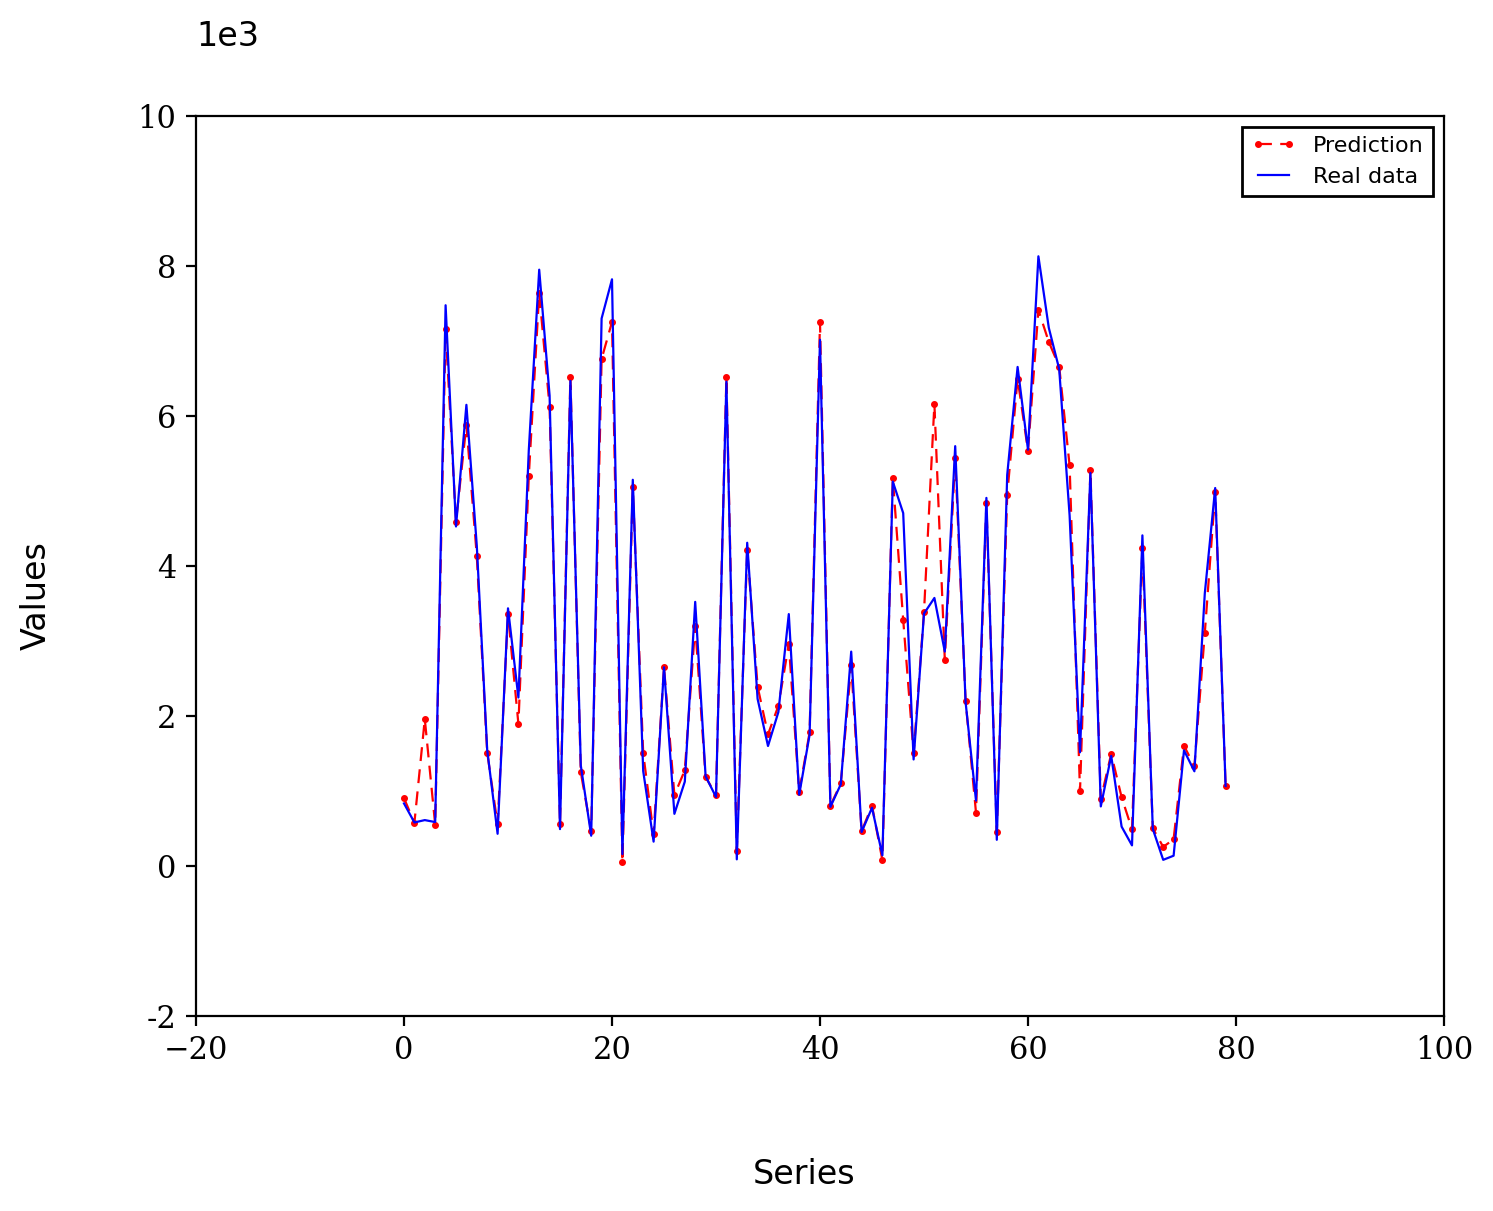

In [39]:
# Make predictions on the test set
import matplotlib.ticker as mticker

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# accuracy
threshold = 0.05  
y_pred=np.array(y_pred)
y_pred = [item for subset in y_pred for item in subset]
y_test=np.array(y_test)
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

# plot

fig, ax = plt.subplots(facecolor='white', figsize=(8,6))
#ax.set_facecolor('white')
plt.style.use('classic')

plt.plot(y_pred[0:80], marker='o',c='r',markersize = 2, linewidth = 0.8, linestyle='-', markeredgecolor='red', dashes=(5, 3),label='Prediction')
plt.plot(y_test.tolist()[0:80], c='b',linestyle='-',linewidth = 0.8,label='Real data')


plt.legend(loc="upper right", fontsize=8)
fig.text(0.5, 0.01, 'Series', size='12', ha='center')
fig.text(0.01, 0.5, 'Values', size='12', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
#plt.grid()
ax.set_facecolor('white')

# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e3', size='12', ha='left', va='top')

#save figure
#folder_path = 'figure/rate_prediction'
#if not os.path.exists(folder_path):
#    os.makedirs(folder_path)
#file_path = os.path.join(folder_path, 'accuracy-linear.pdf' )
#plt.savefig(file_path)

plt.show()

In [40]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9575874911812874


# log models

In [1]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

# Example dataset
diabetes_data = load_diabetes()
X, y = diabetes_data.data, diabetes_data.target
print(X)
print(y)
# Start an MLflow run
with mlflow.start_run():

    # Training a model
    model = RandomForestRegressor()
    model.fit(X, y)

    # Predicting
    predictions = model.predict(X)

    # Calculating metrics
    mse = mean_squared_error(y, predictions)

    # Log model
    mlflow.sklearn.log_model(model, "random_forest_model")

    # Log parameters
    mlflow.log_param("n_estimators", model.n_estimators)
    mlflow.log_param("max_depth", model.max_depth)

    # Log metrics
    mlflow.log_metric("mse", mse)



[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

C:\Users\Qiong\AppData\Local\Programs\Python\Python310\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [46]:
mlflow.end_run()